# Generate manuscript figures

In [1]:
from pathlib import Path
import xarray as xr
import pandas as pd
import verde as vd
import matplotlib.pyplot as plt

## Load custom matplotlib configuration

In [2]:
plt.style.use(Path(".") / "matplotlib.rc")

/home/santi/miniconda3/envs/eql-gradient-boosted/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Define results directory

In [3]:
results_dir = Path("..") / "results"
ground_results_dir = results_dir / "ground_survey"
airborne_results_dir = results_dir / "airborne_survey"

/home/santi/miniconda3/envs/eql-gradient-boosted/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Ground survey

In [4]:
survey = pd.read_csv(ground_results_dir / "survey.csv")

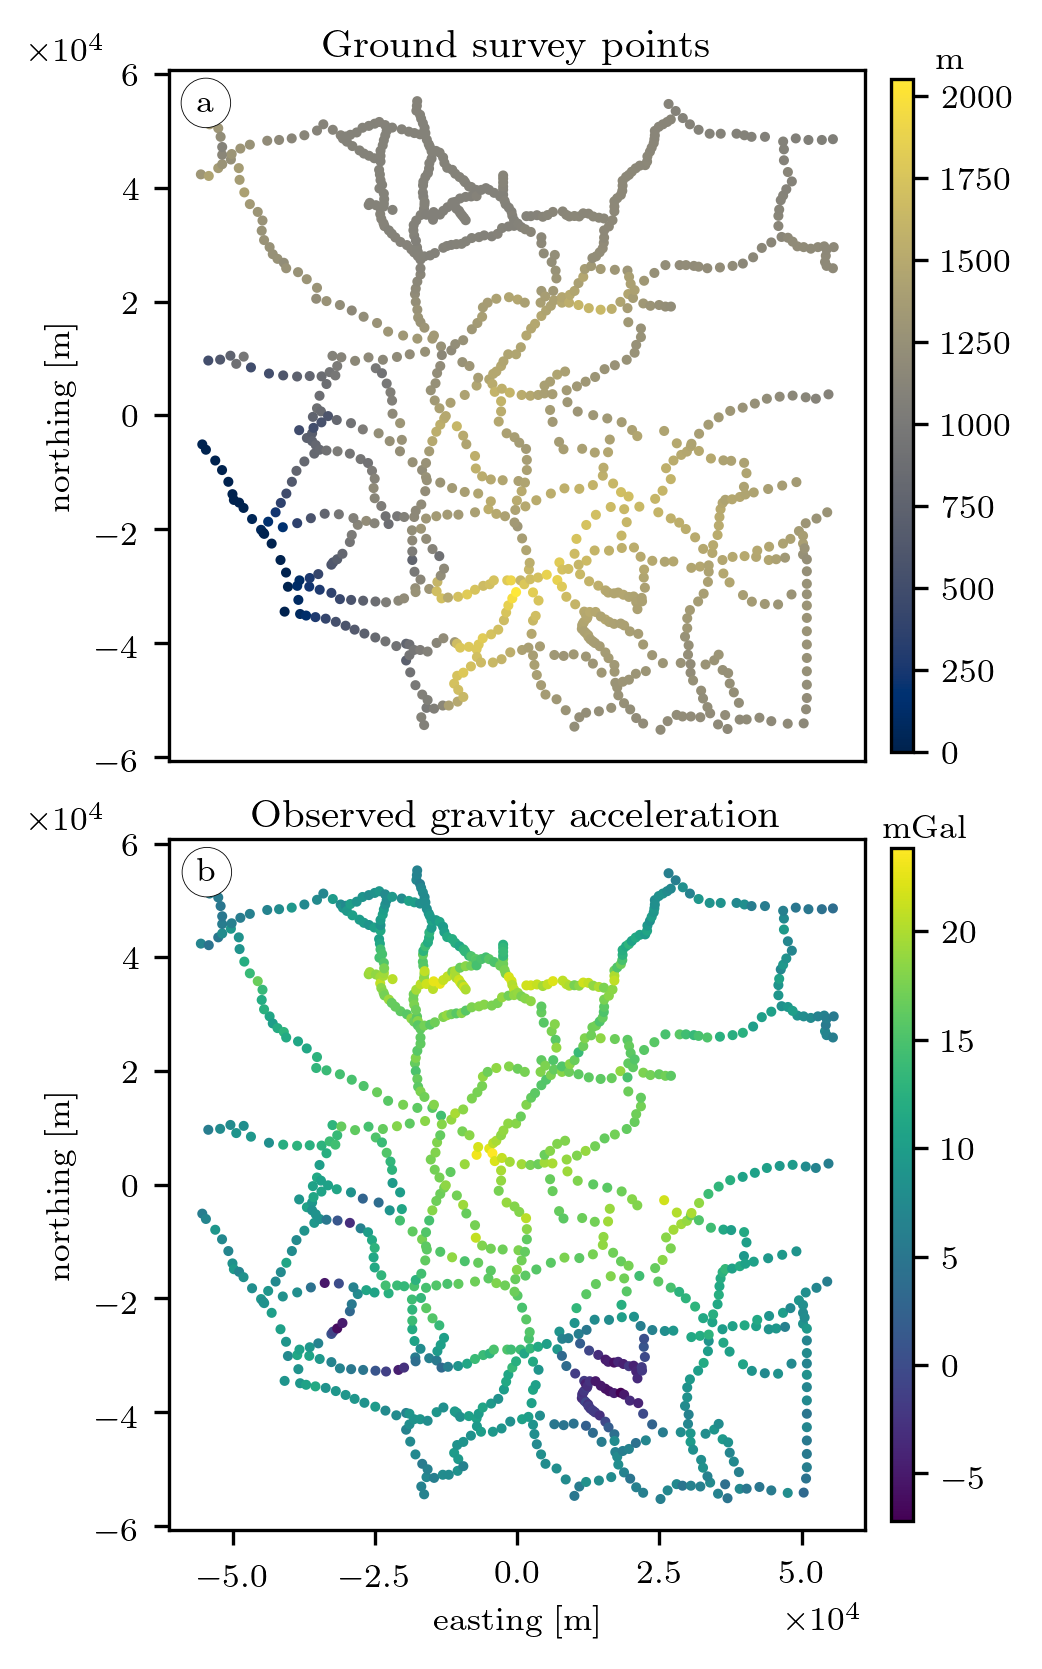

In [5]:
# Define useful parameters
width = 3.33
figsize = (width, width * 1.7)
cbar_shrink = 0.95
cbar_pad = 0.03
cbar_aspect = 30
size = 2
labels = "a b".split()

# Initialize figure and axes
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=figsize)

# Plot survey points
tmp = ax1.scatter(
    survey.easting, survey.northing, c=survey.height, cmap="cividis", s=size
)
clb = plt.colorbar(
    tmp,
    ax=ax1,
    shrink=cbar_shrink,
    orientation="vertical",
    pad=cbar_pad,
    aspect=cbar_aspect,
)
clb.set_label("m", labelpad=-15, y=1.05, rotation=0)

# Plot measured values
tmp = ax2.scatter(survey.easting, survey.northing, c=survey.g_z, cmap="viridis", s=size)
clb = plt.colorbar(
    tmp,
    ax=ax2,
    shrink=cbar_shrink,
    orientation="vertical",
    pad=cbar_pad,
    aspect=cbar_aspect,
)
clb.set_label("mGal", labelpad=-15, y=1.05, rotation=0)


ax2.set_xlabel("easting [m]")
ax1.tick_params(
    axis="x",
    which="both",
    bottom=False,
    top=False,
    labelbottom=False,
)

for ax, label in zip((ax1, ax2), labels):
    ax.set_aspect("equal")
    ax.ticklabel_format(axis="both", style="sci", scilimits=(0, 0))
    ax.set_ylabel("northing [m]")
    ax.yaxis.offsetText.set_x(-0.2)
    ax.annotate(
        label,
        xy=(0.04, 0.94),
        xycoords="axes fraction",
        bbox=dict(boxstyle="circle", fc="white", lw=0.2),
    )

ax1.set_title("Ground survey points", pad=3)
ax2.set_title("Observed gravity acceleration", pad=3)


plt.tight_layout(h_pad=0.2)
plt.savefig(
    Path("..") / "manuscript" / "figs" / "ground-survey.pdf",
    bbox_inches="tight",
    dpi=300,
)

## Airborne survey

In [6]:
survey = pd.read_csv(airborne_results_dir / "survey.csv")

/home/santi/miniconda3/envs/eql-gradient-boosted/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


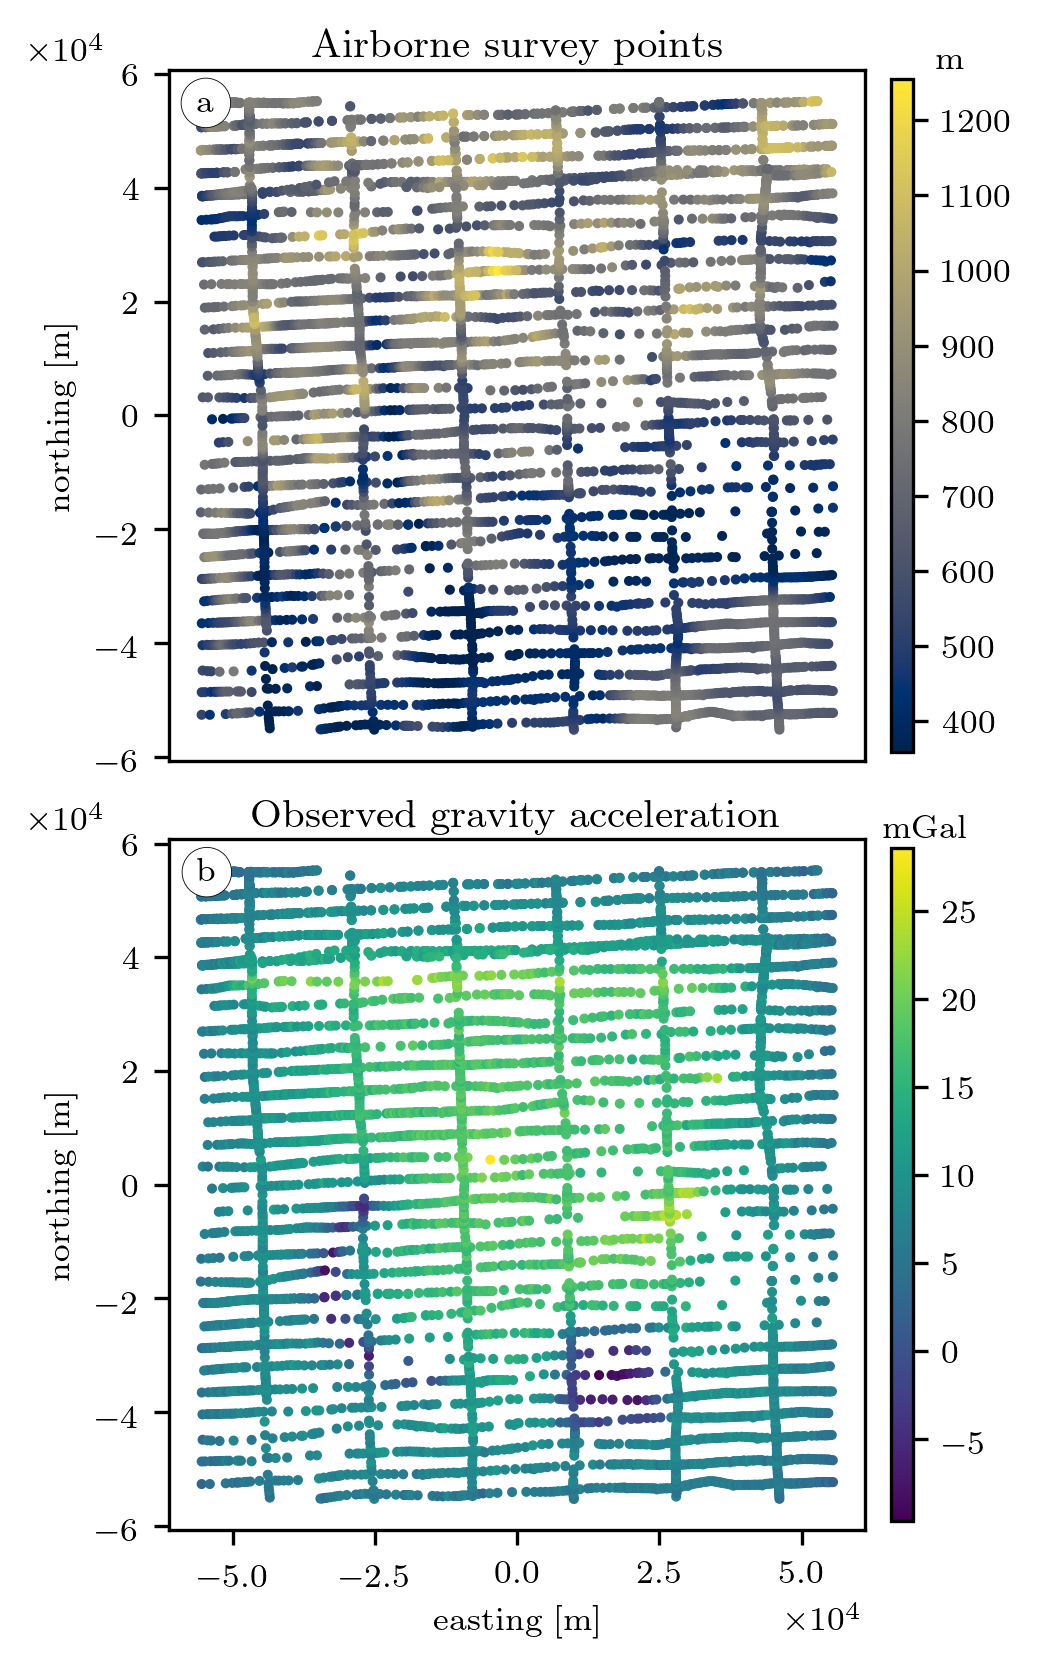

In [7]:
# Define useful parameters
width = 3.33
figsize = (width, width * 1.7)
cbar_shrink = 0.95
cbar_pad = 0.03
cbar_aspect = 30
size = 2
labels = "a b".split()

# Initialize figure and axes
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=figsize)

# Plot survey points
tmp = ax1.scatter(
    survey.easting, survey.northing, c=survey.height, cmap="cividis", s=size
)
clb = plt.colorbar(
    tmp, ax=ax1, shrink=cbar_shrink, orientation="vertical", pad=0.03, aspect=30
)
clb.set_label("m", labelpad=-15, y=1.05, rotation=0)

# Plot measured values
tmp = ax2.scatter(survey.easting, survey.northing, c=survey.g_z, cmap="viridis", s=size)
clb = plt.colorbar(
    tmp, ax=ax2, shrink=cbar_shrink, orientation="vertical", pad=0.03, aspect=30
)
clb.set_label("mGal", labelpad=-15, y=1.05, rotation=0)

ax2.set_xlabel("easting [m]")
ax1.tick_params(
    axis="x",
    which="both",
    bottom=False,
    top=False,
    labelbottom=False,
)

for ax, label in zip((ax1, ax2), labels):
    ax.set_aspect("equal")
    ax.ticklabel_format(axis="both", style="sci", scilimits=(0, 0))
    ax.set_ylabel("northing [m]")
    ax.yaxis.offsetText.set_x(-0.2)
    ax.annotate(
        label,
        xy=(0.04, 0.94),
        xycoords="axes fraction",
        bbox=dict(boxstyle="circle", fc="white", lw=0.2),
    )

ax1.set_title("Airborne survey points", pad=3)
ax2.set_title("Observed gravity acceleration", pad=3)

plt.tight_layout(h_pad=0.2)
plt.savefig(
    Path("..") / "manuscript" / "figs" / "airborne-survey.pdf",
    bbox_inches="tight",
    dpi=300,
)

## Target grid

In [8]:
target = xr.open_dataarray(results_dir / "target.nc")

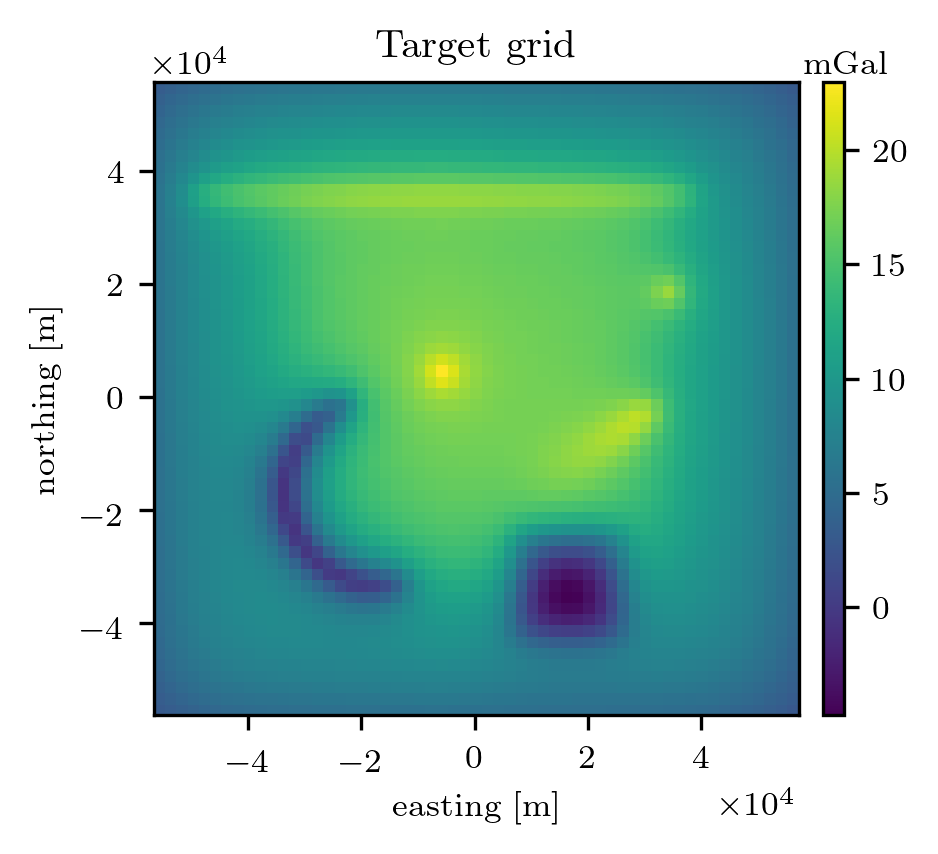

In [9]:
width = 3.33
figsize = (width, width * 0.85)
fig, ax = plt.subplots(figsize=figsize)

tmp = target.plot.pcolormesh(
    ax=ax, add_colorbar=False, cmap="viridis", center=False, rasterized=True
)
ax.set_aspect("equal")
ax.ticklabel_format(axis="both", style="sci", scilimits=(0, 0))
ax.set_xlabel(ax.get_xlabel() + " [m]")
ax.set_ylabel(ax.get_ylabel() + " [m]")
clb = plt.colorbar(tmp, ax=ax, shrink=1, orientation="vertical", pad=0.03, aspect=30)
clb.set_label("mGal", labelpad=-15, y=1.05, rotation=0)

ax.set_title("Target grid")
plt.tight_layout()
plt.savefig(
    Path("..") / "manuscript" / "figs" / "target-grid.pdf",
    bbox_inches="tight",
    dpi=300,
)
plt.show()

## Gridding ground survey

In [10]:
layouts = ["source_below_data", "block_averaged_sources", "grid_sources"]
field_units = "mGal"

best_predictions = []
for layout in layouts:
    best_predictions.append(
        xr.open_dataset(ground_results_dir / "best_predictions-{}.nc".format(layout))
    )

/home/santi/miniconda3/envs/eql-gradient-boosted/lib/python3.7/site-packages/ipykernel_launcher.py:80: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


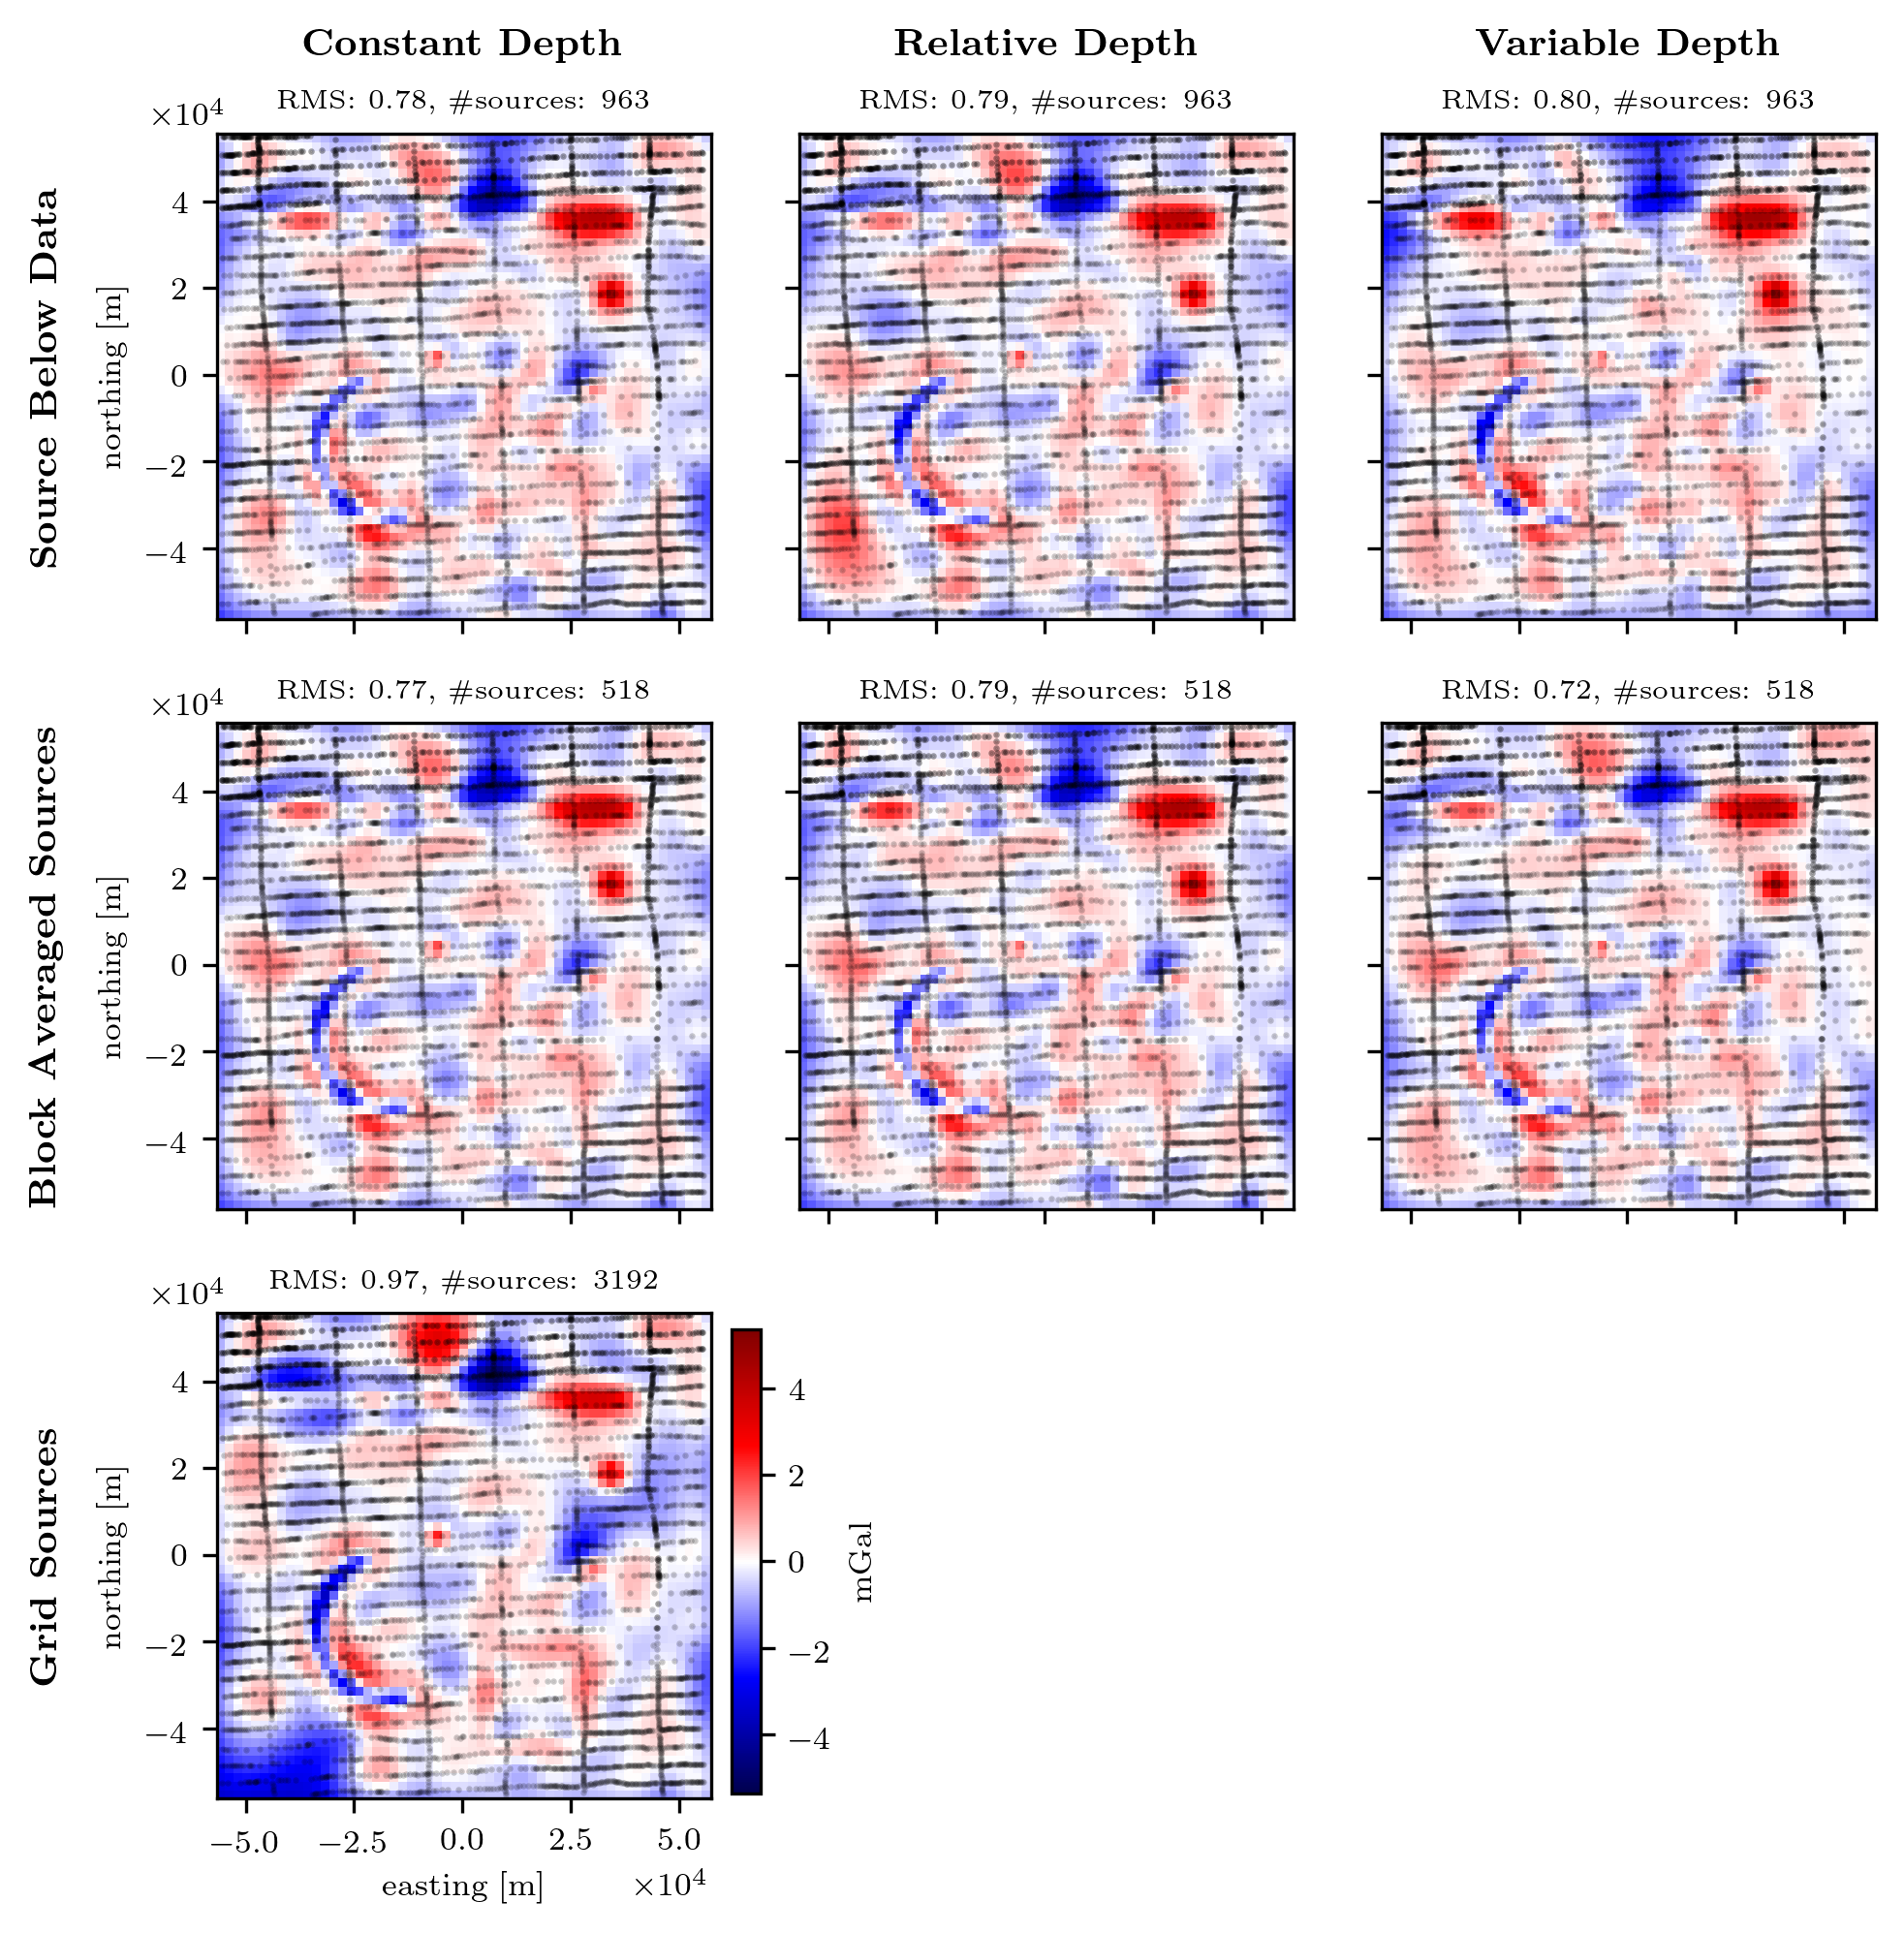

In [11]:
# We will use the same boundary value for each plot in order to
# show them with the same color scale.
vmax = vd.maxabs(
    *list(
        target - dataset[depth_type]
        for dataset in best_predictions
        for depth_type in dataset
    )
)

# Initialize figure
fig, axes = plt.subplots(
    nrows=3, ncols=3, figsize=(6.66, 6.66), sharex=True, sharey=True
)

# Plot the differences between the target and the best prediction for each layout
for i, (ax_row, dataset) in enumerate(zip(axes, best_predictions)):
    for j, (ax, depth_type) in enumerate(zip(ax_row, dataset)):
        prediction = dataset[depth_type]
        difference = target - prediction
        tmp = difference.plot.pcolormesh(
            ax=ax,
            vmin=-vmax,
            vmax=vmax,
            cmap="seismic",
            add_colorbar=False,
            rasterized=True,
        )
        ax.scatter(survey.easting, survey.northing, s=0.3, alpha=0.2, color="k")
        ax.set_aspect("equal")
        # Set scientific notation on axis labels (and change offset text position)
        ax.ticklabel_format(axis="both", style="sci", scilimits=(0, 0))
        ax.yaxis.offsetText.set_x(-0.13)
        ax.set_xlabel(ax.get_xlabel() + " [m]")
        ax.set_ylabel(ax.get_ylabel() + " [m]")
        # Set title with RMS and number of points
        ax.set_title(
            r"RMS: {:.2f}, \#sources: {}".format(prediction.rms, prediction.n_points),
            fontsize="small",
            horizontalalignment="center",
        )

        # Annotate the columns of the figure
        if i == 0:
            ax.text(
                0.5,
                1.16,
                r"\textbf{{" + depth_type.replace("_", " ").title() + r"}}",
                fontsize="large",
                fontweight="bold",
                horizontalalignment="center",
                transform=ax.transAxes,
            )
        # Annotate the rows of the figure
        if j == 0:
            ax.text(
                -0.38,
                0.5,
                r"\textbf{{" + dataset.layout.replace("_", " ").title() + r"}}",
                fontsize="large",
                fontweight="bold",
                verticalalignment="center",
                rotation="vertical",
                transform=ax.transAxes,
            )
        # Remove xlabels and ylabels from inner axes
        if i != 2:
            ax.set_xlabel("")
        if j != 0:
            ax.set_ylabel("")

# Hide the last two axes because they are not used
axes[-1][-1].set_visible(False)
axes[-1][-2].set_visible(False)

# Add colorbar
cbar_ax = fig.add_axes([0.38, 0.075, 0.015, 0.24])
fig.colorbar(tmp, cax=cbar_ax, orientation="vertical", label=field_units)

plt.tight_layout()
plt.savefig(
    Path("..") / "manuscript" / "figs" / "ground_survey_differences.pdf", dpi=300
)
plt.show()

## Gridding airborne survey

In [12]:
layouts = ["source_below_data", "block_averaged_sources", "grid_sources"]
field_units = "mGal"

best_predictions = []
for layout in layouts:
    best_predictions.append(
        xr.open_dataset(airborne_results_dir / "best_predictions-{}.nc".format(layout))
    )

/home/santi/miniconda3/envs/eql-gradient-boosted/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/santi/miniconda3/envs/eql-gradient-boosted/lib/python3.7/site-packages/ipykernel_launcher.py:80: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


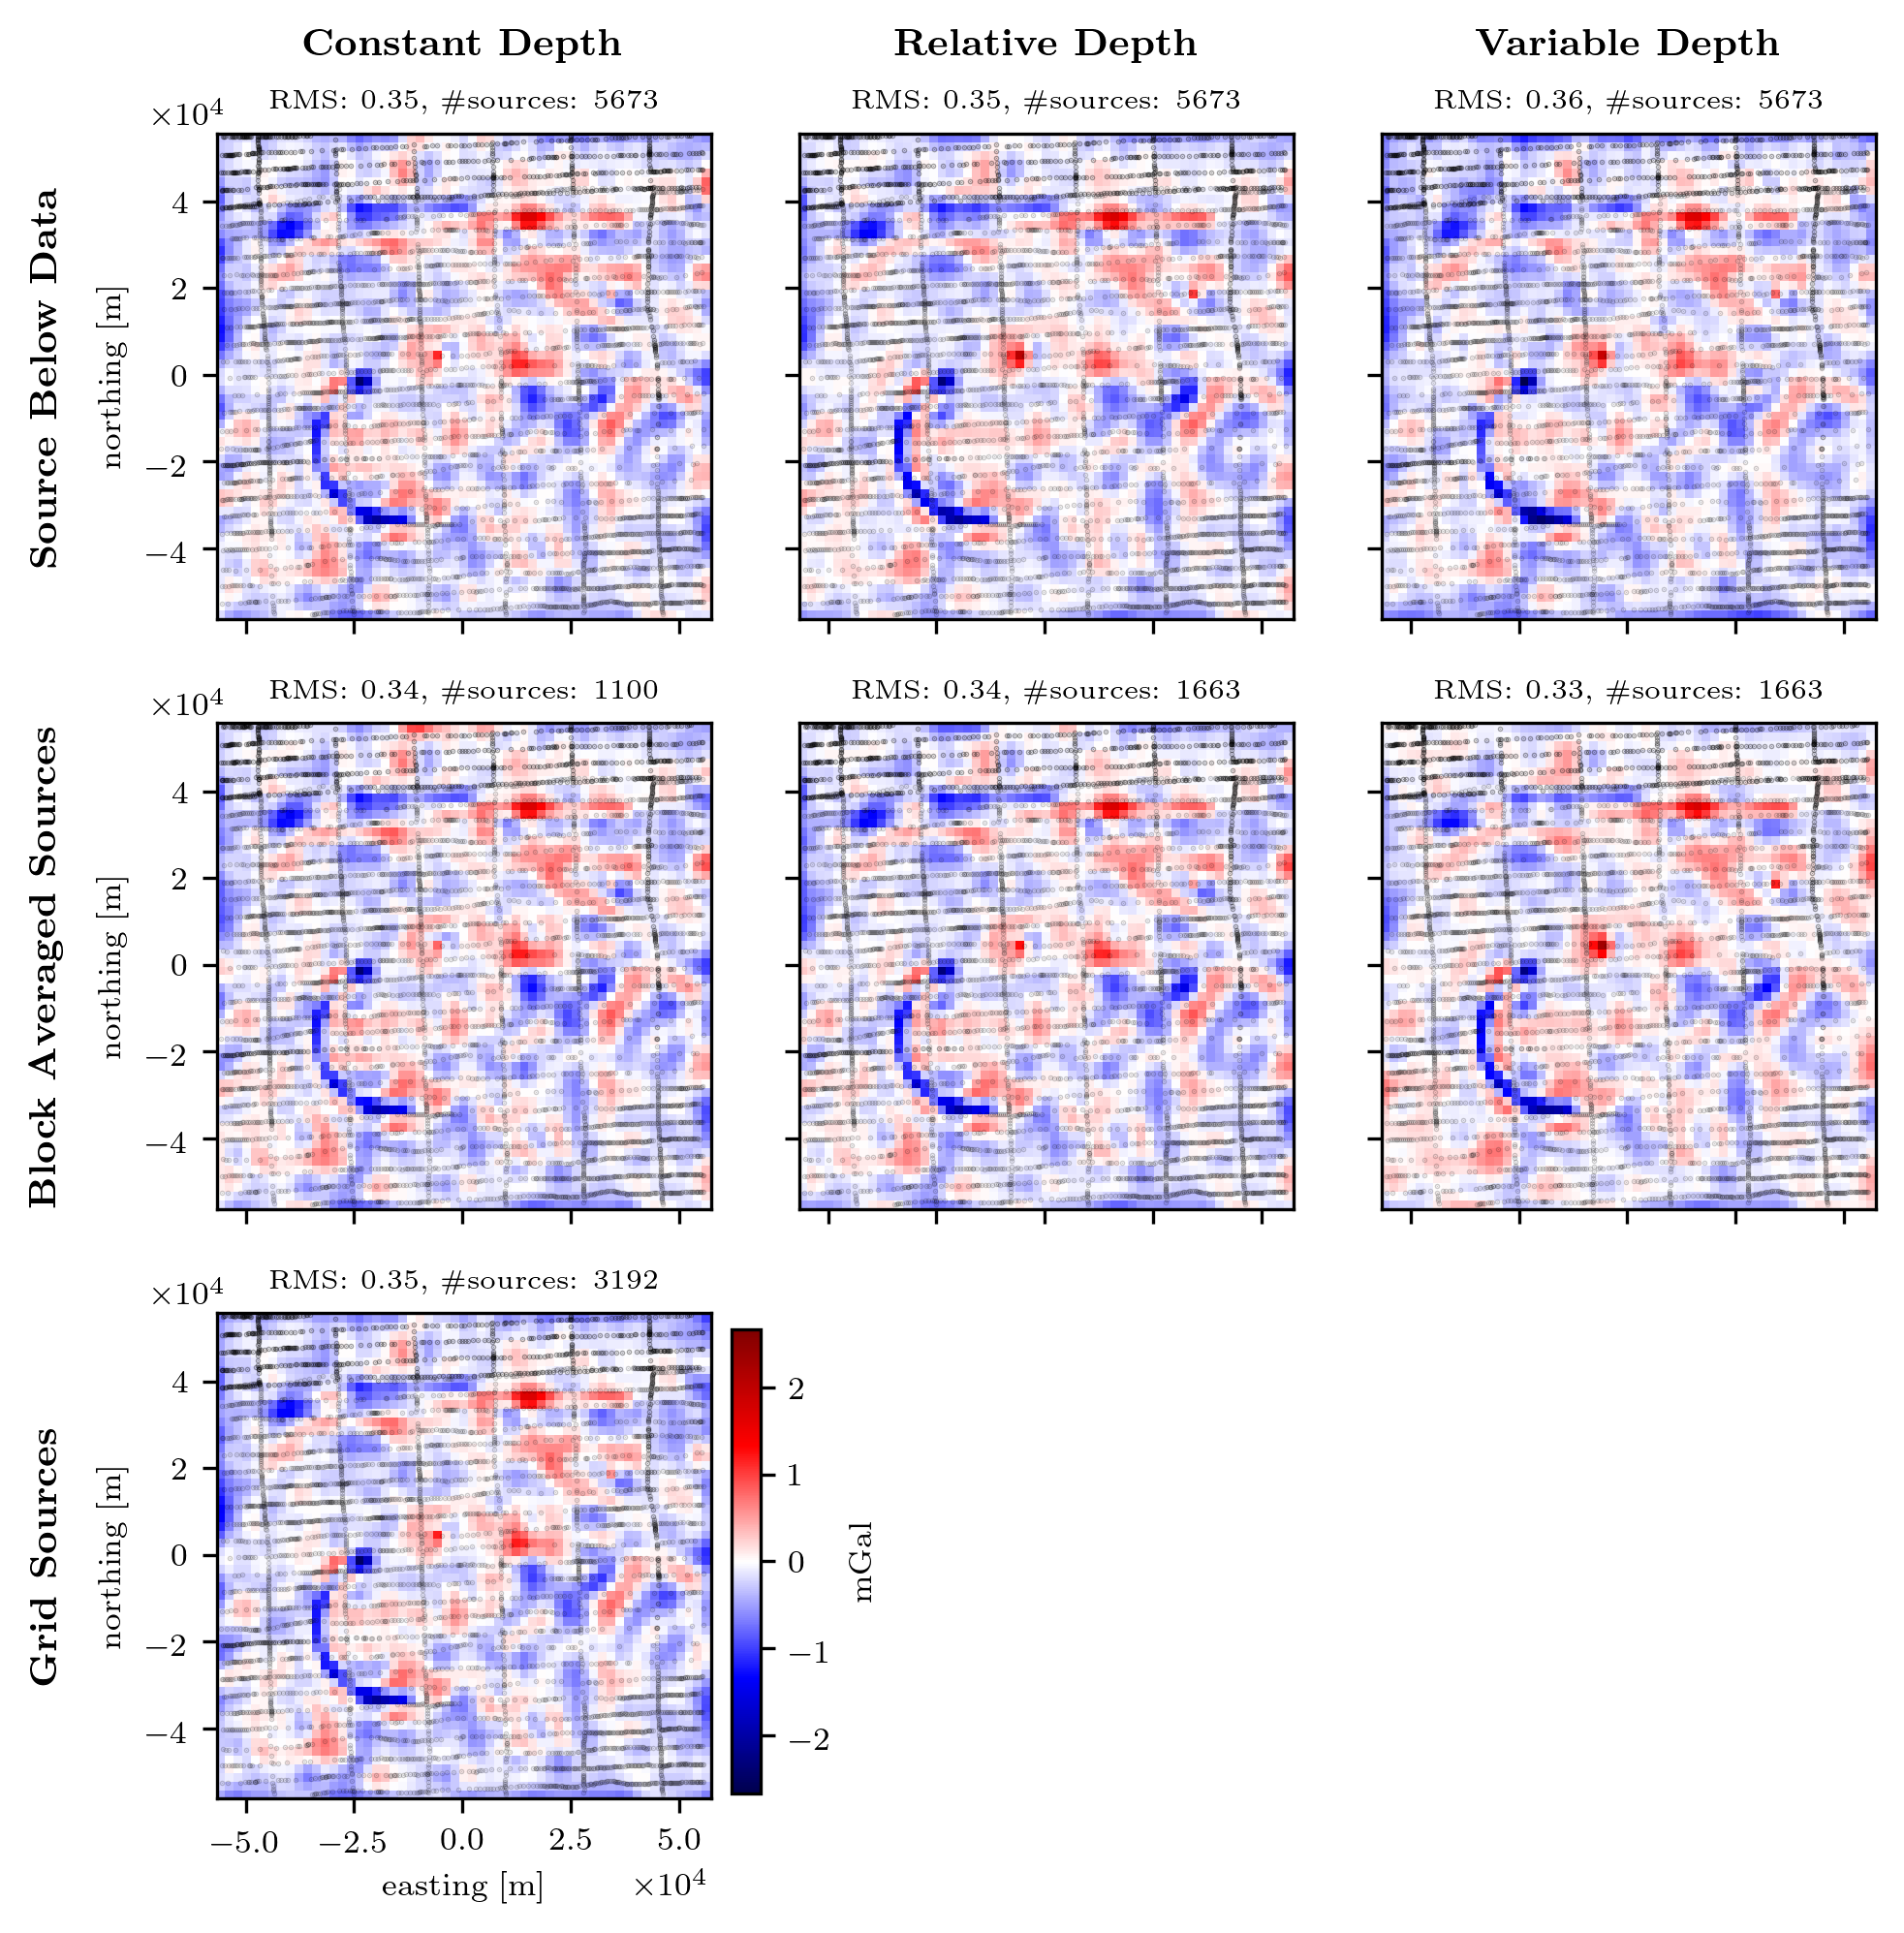

In [13]:
# We will use the same boundary value for each plot in order to
# show them with the same color scale.
vmax = vd.maxabs(
    *list(
        target - dataset[depth_type]
        for dataset in best_predictions
        for depth_type in dataset
    )
)

# Initialize figure
fig, axes = plt.subplots(
    nrows=3, ncols=3, figsize=(6.66, 6.66), sharex=True, sharey=True
)

# Plot the differences between the target and the best prediction for each layout
for i, (ax_row, dataset) in enumerate(zip(axes, best_predictions)):
    for j, (ax, depth_type) in enumerate(zip(ax_row, dataset)):
        prediction = dataset[depth_type]
        difference = target - prediction
        tmp = difference.plot.pcolormesh(
            ax=ax,
            vmin=-vmax,
            vmax=vmax,
            cmap="seismic",
            add_colorbar=False,
            rasterized=True,
        )
        ax.scatter(survey.easting, survey.northing, s=0.1, alpha=0.2, color="k")
        ax.set_aspect("equal")
        # Set scientific notation on axis labels (and change offset text position)
        ax.ticklabel_format(axis="both", style="sci", scilimits=(0, 0))
        ax.yaxis.offsetText.set_x(-0.13)
        ax.set_xlabel(ax.get_xlabel() + " [m]")
        ax.set_ylabel(ax.get_ylabel() + " [m]")
        # Set title with RMS and number of points
        ax.set_title(
            r"RMS: {:.2f}, \#sources: {}".format(prediction.rms, prediction.n_points),
            fontsize="small",
            horizontalalignment="center",
        )

        # Annotate the columns of the figure
        if i == 0:
            ax.text(
                0.5,
                1.16,
                r"\textbf{{" + depth_type.replace("_", " ").title() + r"}}",
                fontsize="large",
                fontweight="bold",
                horizontalalignment="center",
                transform=ax.transAxes,
            )
        # Annotate the rows of the figure
        if j == 0:
            ax.text(
                -0.38,
                0.5,
                r"\textbf{{" + dataset.layout.replace("_", " ").title() + r"}}",
                fontsize="large",
                fontweight="bold",
                verticalalignment="center",
                rotation="vertical",
                transform=ax.transAxes,
            )
        # Remove xlabels and ylabels from inner axes
        if i != 2:
            ax.set_xlabel("")
        if j != 0:
            ax.set_ylabel("")

# Hide the last two axes because they are not used
axes[-1][-1].set_visible(False)
axes[-1][-2].set_visible(False)

# Add colorbar
cbar_ax = fig.add_axes([0.38, 0.075, 0.015, 0.24])
fig.colorbar(tmp, cax=cbar_ax, orientation="vertical", label=field_units)

plt.tight_layout()
plt.savefig(
    Path("..") / "manuscript" / "figs" / "airborne_survey_differences.pdf", dpi=300
)
plt.show()